In [2]:
from EXP1whiteblackground import clean_experiment_data, calculate_row_mlae, plot_mlae_heatmap, average_mlae_and_visualize, plot_vectorized_predictions_scatter, display_images_combined_by_degree, generate_images_for_multiple_angles, analyze_best_model_by_image_type, analyze_image_type_per_model, plot_mlae_per_image

I converted from svg to pdf as input for pretrained models as they won't take svg as an input.

### Generate 10 images with 10 angle degrees with aliased, anti-aliasied, and vectorized images.

In [ ]:
generate_images_for_multiple_angles(canvas_size=100, line_length=30, num_angles=10)

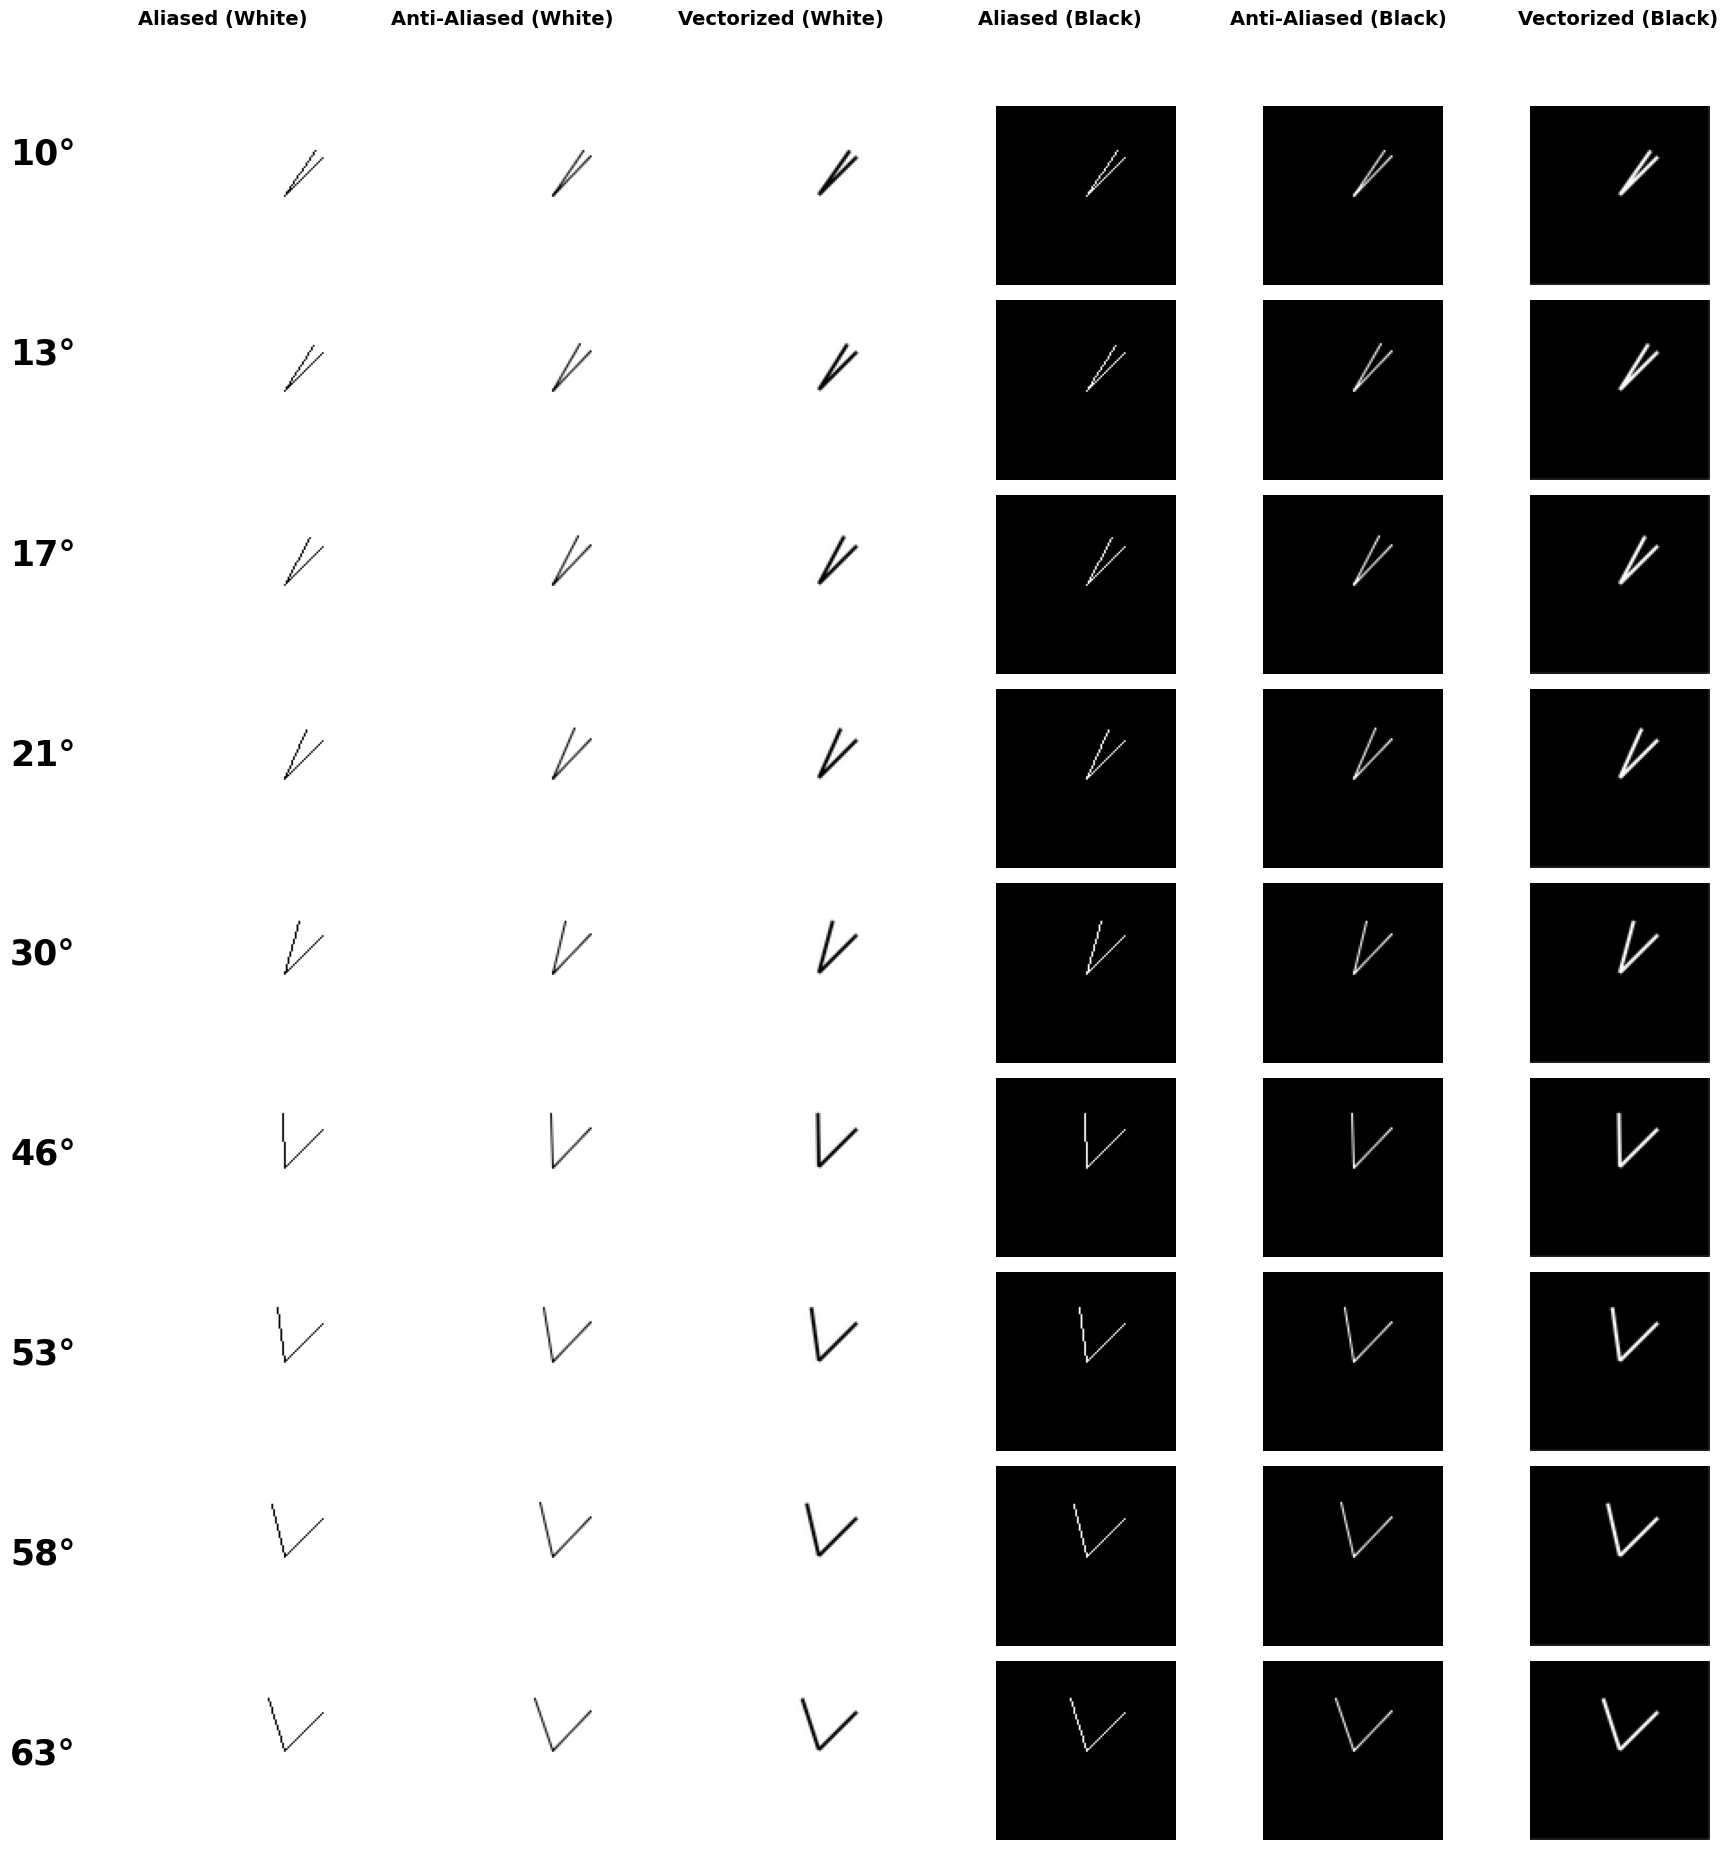

In [5]:
display_images_combined_by_degree("./generated_images")

### Run experiments

In [ ]:
# Add LLMP path
from EXP1whiteblackground import generate_images_for_multiple_angles, display_images_combined_by_degree, Runexp1, prepare_image_data
import LLMP as L

image_dir = "./generated-images/"

# Prepare image data
data = prepare_image_data(image_dir)

# Define model instances
model_instances = {
    "gpt4o": L.GPTModel("gpt-4o"),
    "LLaMA": L.llama("meta-llama/Llama-3.2-11B-Vision-Instruct"),
    "GeminiProVision": L.GeminiProVision(),
    "Gemini1_5Flash": L.Gemini1_5Flash()
}
# Create Runexp1 instance and run the experiment
experiment = Runexp1()

experiment.run_angle_experiment(data=data, model_instances=model_instances)

In [2]:
from EXP1whiteblackground import clean_experiment_data, calculate_mlae, calculate_row_mlae, plot_mlae_heatmap
import pandas as pd

file_path = "./EXP1-Results/angle_results.csv"

df = pd.read_csv(file_path)

df = clean_experiment_data("./EXP1-Results/angle_results.csv")


### Check how many times each image appear

In [3]:

# Count occurrences of each file_name
file_name_counts = df["file_name"].value_counts()

# Display the counts
file_name_counts

file_name
vectorized_image_black_21.pdf     12
aliased_image_black_17.png        12
aliased_image_black_10.png        12
aliased_image_white_30.png        12
vectorized_image_black_53.pdf     12
vectorized_image_white_46.pdf     12
vectorized_image_black_13.pdf     12
antialiased_image_white_10.png    12
antialiased_image_black_30.png    12
antialiased_image_white_17.png    12
aliased_image_white_13.png        12
antialiased_image_black_21.png    12
antialiased_image_black_53.png    12
aliased_image_black_46.png        12
aliased_image_white_53.png        12
antialiased_image_white_46.png    12
aliased_image_white_21.png        12
vectorized_image_white_17.pdf     12
antialiased_image_black_13.png    12
vectorized_image_white_10.pdf     12
vectorized_image_black_30.pdf     12
aliased_image_black_58.png        12
antialiased_image_white_63.png    12
aliased_image_black_63.png        12
antialiased_image_white_58.png    12
vectorized_image_white_63.pdf     12
vectorized_image_white_58.pd

In [4]:
# Apply MLAE calculation row-wise
df['MLAE'] = df.apply(calculate_row_mlae, axis=1)

df.head(12)

,file_name,ground_truth,model,prediction,MLAE
0,vectorized_image_black_21.pdf,21,gpt4o,30.0,3.189825
1,vectorized_image_black_21.pdf,21,LLaMA,45.0,4.592457
2,vectorized_image_black_21.pdf,21,GeminiProVision,30.0,3.189825
3,vectorized_image_black_21.pdf,21,Gemini1_5Flash,30.0,3.189825
4,aliased_image_black_17.png,17,gpt4o,30.0,3.714246
5,aliased_image_black_17.png,17,LLaMA,15.0,1.087463
6,aliased_image_black_17.png,17,GeminiProVision,45.0,4.813781
7,aliased_image_black_17.png,17,Gemini1_5Flash,45.0,4.813781
8,aliased_image_black_10.png,10,gpt4o,45.0,5.134426
9,aliased_image_black_10.png,10,LLaMA,45.0,5.134426


### Display number of rows for each image type

In [5]:
# Extract the image type from the file name
df['image_type'] = df['file_name'].str.extract(r'(aliased|antialiased|vectorized)')

# Print the count of rows for each image type
row_counts = df['image_type'].value_counts()

for image_type, count in row_counts.items():

    print(f"  {image_type}: {count} rows")

  vectorized: 216 rows
  aliased: 216 rows
  antialiased: 216 rows


#### Analyze which image type works best for each model

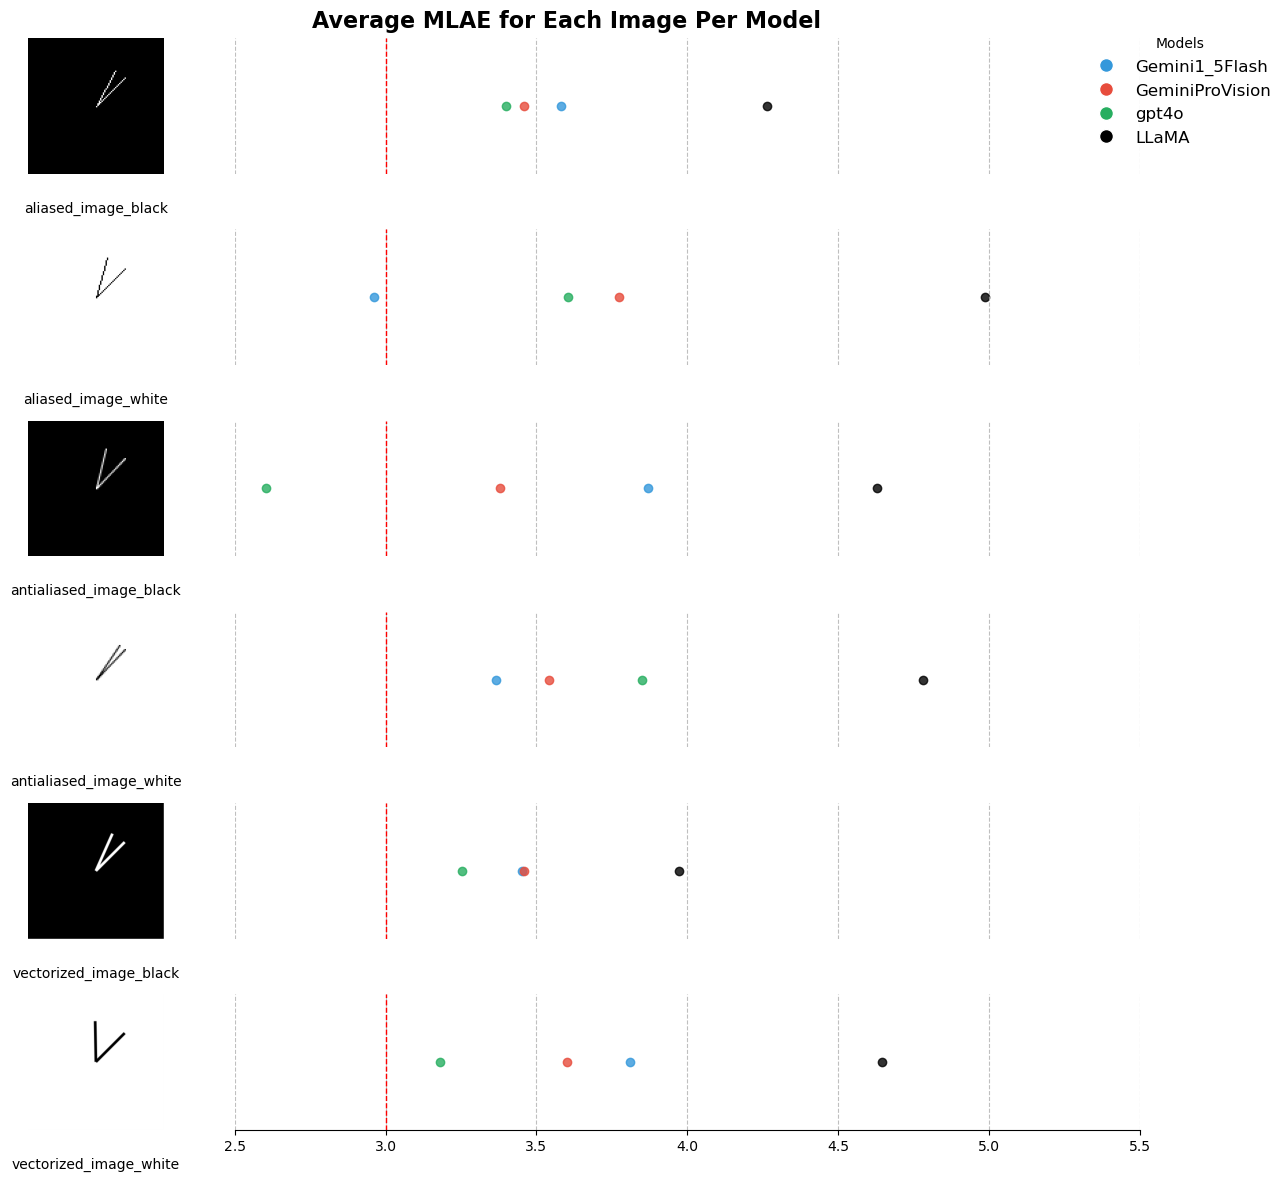

In [6]:
from EXP1whiteblackground import plot_mlae_per_image

# Call the function
plot_mlae_per_image(
    df=df,
    image_folder="./generated_images",
    model_colors={
        'Gemini1_5Flash': '#3498DB',  # Blue
        'GeminiProVision': '#E74C3C',  # Red
        'gpt4o': '#27AE60',           # Green
        'LLaMA': '#000000'
    }
)

In [7]:
# Extract image types and calculate average MLAE
df["image_type"] = df["file_name"].apply(lambda x: "_".join(x.split("_")[:-1]))
average_mlae = df.groupby(["image_type", "model"])["MLAE"].mean().reset_index()

# Find the image type with the lowest sum of average MLAE across models
sum_mlae_per_image = average_mlae.groupby("image_type")["MLAE"].sum()

average_mlae

,image_type,model,MLAE
0,aliased_image_black,Gemini1_5Flash,3.582812
1,aliased_image_black,GeminiProVision,3.457540
2,aliased_image_black,LLaMA,4.264931
3,aliased_image_black,gpt4o,3.397455
4,aliased_image_white,Gemini1_5Flash,2.960362
5,aliased_image_white,GeminiProVision,3.772535
6,aliased_image_white,LLaMA,4.984111
7,aliased_image_white,gpt4o,3.603099
8,antialiased_image_black,Gemini1_5Flash,3.870100
9,antialiased_image_black,GeminiProVision,3.378968
